In [1]:
import pandas as pd

In [201]:
points_url = 'http://www.espn.com/nba/statistics/player/_/stat/scoring-per-game/sort/avgPoints/qualified/false/count/{count}'

In [202]:
reb_url = 'http://www.espn.com/nba/statistics/player/_/stat/rebounds/sort/avgRebounds/count/{count}'

def parse_espn_stats(type_='points'):

    tables = []
    
    if type_ == 'points':
        url = points_url
    else:
        url = reb_url
    

    for i in range(13):
        count = 1 + (i * 40)
        print(url.format(count=count))
        table = pd.read_html(url.format(count=count), header=0)[0]

        # filter out header columns
        table = table[pd.to_numeric(table['GP'], errors='coerce').notnull()]

        for col in table.columns:
            if col not in ['PLAYER', 'TEAM', 'FGM-FGA', '3PM-3PA', 'FTM-FTA']:
                table[col] = pd.to_numeric(table[col], errors='coerce')

        tables.append(table)

    df = pd.concat(tables)
    df['POS'] = df.PLAYER.apply(lambda x: x.split(',')[-1].strip())
    df['PLAYER'] = df.PLAYER.apply(lambda x: x.split(',')[0])
    df = df.set_index('PLAYER')
    
    return df

In [203]:
df = parse_espn_stats()

http://www.espn.com/nba/statistics/player/_/stat/scoring-per-game/sort/avgPoints/qualified/false/count/1
http://www.espn.com/nba/statistics/player/_/stat/scoring-per-game/sort/avgPoints/qualified/false/count/41
http://www.espn.com/nba/statistics/player/_/stat/scoring-per-game/sort/avgPoints/qualified/false/count/81
http://www.espn.com/nba/statistics/player/_/stat/scoring-per-game/sort/avgPoints/qualified/false/count/121
http://www.espn.com/nba/statistics/player/_/stat/scoring-per-game/sort/avgPoints/qualified/false/count/161
http://www.espn.com/nba/statistics/player/_/stat/scoring-per-game/sort/avgPoints/qualified/false/count/201
http://www.espn.com/nba/statistics/player/_/stat/scoring-per-game/sort/avgPoints/qualified/false/count/241
http://www.espn.com/nba/statistics/player/_/stat/scoring-per-game/sort/avgPoints/qualified/false/count/281
http://www.espn.com/nba/statistics/player/_/stat/scoring-per-game/sort/avgPoints/qualified/false/count/321
http://www.espn.com/nba/statistics/player

In [205]:
advanced["POS"] = df['POS']

In [182]:
advanced = pd.read_csv('../data/advanced_metrics.csv', index_col=0)


In [220]:
advanced.loc[['Tim Hardaway Jr.', "E'Twaun Moore", 'MarShon Brooks'], 'POS'] = 'SG'
advanced.loc[['Isaiah Canaan'], 'POS'] = 'PG'

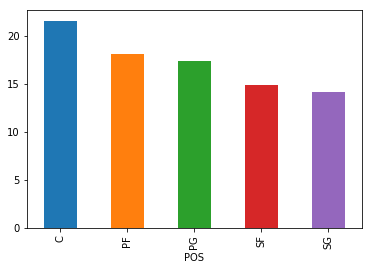

In [222]:
advanced.columns

Index(['MPG', 'TEAM', 'TS%', 'AST', 'TO', 'USG', 'ORR', 'DRR', 'REBR', 'PER',
       'ORPM', 'DRPM', 'RPM', 'POS'],
      dtype='object')

In [ ]:
advanced.to_csv

In [227]:
cols = list(advanced.columns)
cols.insert(2, cols.pop(cols.index('POS')))
advanced.reindex(columns=cols).to_csv("../data/advanced_metrics.csv")

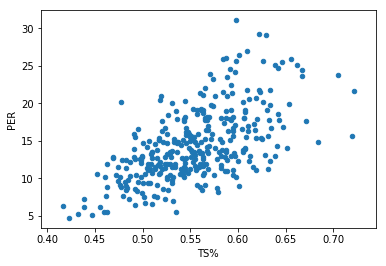

In [165]:
advanced.join(reb_df, lsuffix='_adv').plot(x='TS%', y='PER', kind='scatter')